In [1]:
import numpy as np
from numpy.linalg import eig, det

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sympy as sp
from scipy.integrate import odeint, ode
from scipy.optimize import fsolve, root

In [2]:
def trp_eqs(v, u_R):
    """
    Define parameter and ODE's describing the trp operon
    x = x[0] : mRNA conc
    y = x[1] : enzyme conc
    z = x[2] : trp conc
    """
    x = v[0]
    y = v[1]
    z = v[2]
    
    # Constants
    a_1 = 0.9
    a_2 = 0.02
    a_3 = 0.0
    a_4 = 0.024
    a_5 = 430.0
    a_6 = -7.5
    k = 0.005
    T = 0.0156
    r = 10.0
    k_i = 2283.0
    u_m = 0.0312
    u = u_R * u_m
    
    # ODE's
    dx = (z+1)/(1+(1+r)*z) - (a_1 + u)*x
    dy = x - (a_2+u)*y
    dz = y*((k_i**2)/((k_i**2)+(z**2))) - (a_3 + u)*z - a_4*(z/(z+1)) - a_5*(1+a_6*u)*u*(z/(z+k))
    
    return [dx, dy, dz]

In [3]:
def trp_dynamics(v, t, u_R):
    """
    Helper function for simulating trp operon dynamics over time
    """
    return trp_eqs(v, u_R)

In [10]:
v0 = [0.0, 0.0, 0.01]
t = np.linspace(0, 500, 1000)

In [21]:
sol = odeint(trp_dynamics, v0, t, args=(0.7,))

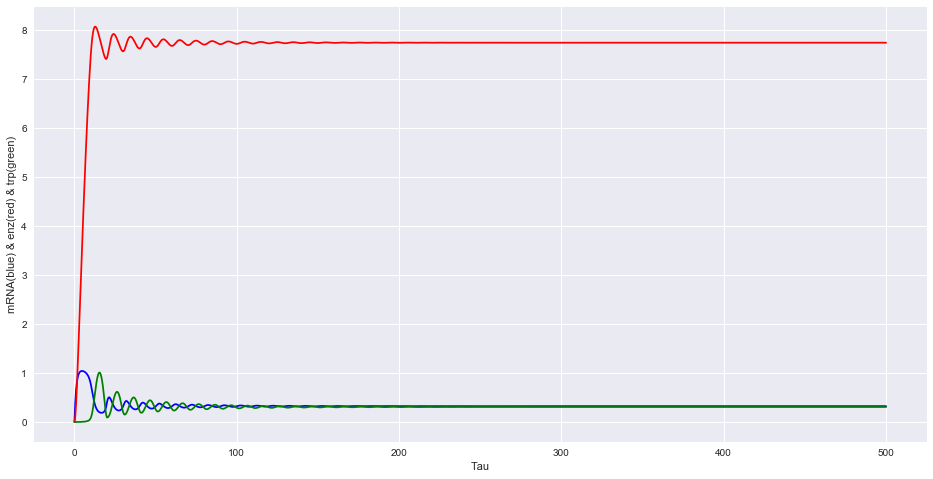

In [22]:
plt.figure(figsize=(16, 8))
plt.plot(t, sol[:,0], 'b')
plt.plot(t, sol[:,1], 'r')
plt.plot(t, sol[:,2], 'g')
plt.xlabel('Tau')
plt.ylabel('mRNA(blue) & enz(red) & trp(green)')

In [25]:
def ss_concs(u_R_vec):
    x_stars = []
    y_stars = []
    z_stars = []
    for u_R in u_R_vec:
        x_star, y_star, z_star = fsolve(trp_eqs, (0, 0, 0), args=(u_R,))
        x_stars.append(x_star)
        y_stars.append(y_star)
        z_stars.append(z_star)
    x_stars = np.array(x_stars)
    y_stars = np.array(y_stars)
    z_stars = np.array(z_stars)
    return x_stars, y_stars, z_stars

In [26]:
u_R_vals = np.arange(0.0, 1.0, 0.01)
x_stars, y_stars, z_stars = ss_concs(u_R_vals)

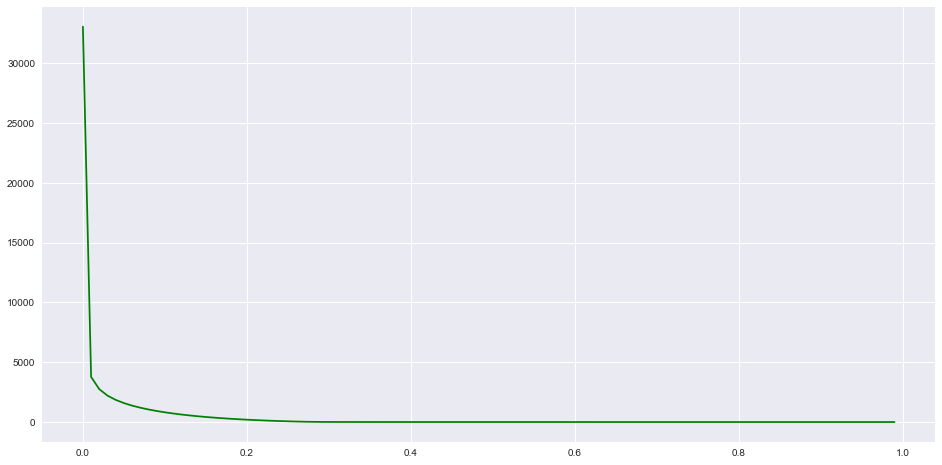

In [27]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(u_R_vals, z_stars, 'g', label='Trp')

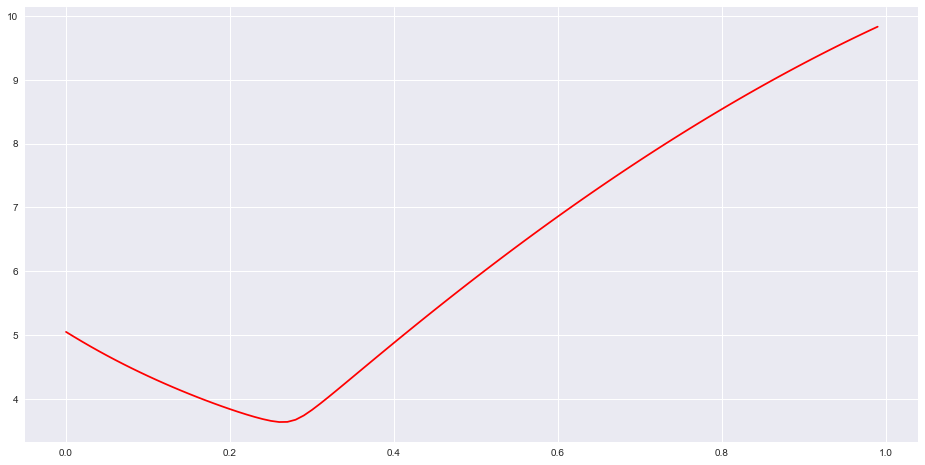

In [32]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(u_R_vals, y_stars, 'r', label='enzyme')

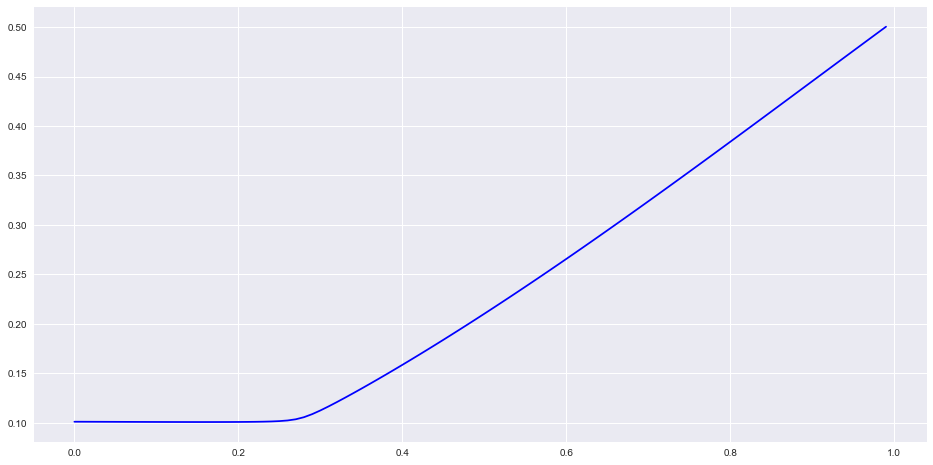

In [33]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(u_R_vals, x_stars, 'b', label='mRNA')